# Linear Algebra in Python

## Introduction

This notebook covers topics related to linear algebra, including the definiteness of matrices, eigenvalue decomposition, singular value decomposition, and the condition number of a matrix. These topics are essential in many areas of data analysis and machine learning, and understanding them will help develop more robust and efficient algorithms. We will use the NumPy library. However, this time we will also incorporate the Matplotlib library for visualization purposes.

## Definiteness of a Matrix

The definiteness of a matrix is an important concept in linear algebra, which is used extensively in optimization because, in particular, it can define the properties of a cost function on its entire domain or at certain points of interest. It is quite important for us since a cost function represents the performance of a machine learning model.

Consider the following example with a square real symmetric matrix $B$ defined in the cell below. Let us verify if it is positive semi-definite.

In [1]:
import numpy as np

# Define a square real symmetric matrix B
B = np.array([[300, 270, 460, 800, 350],
              [270, 740, 600, 540, 380],
              [460, 600, 300, 490, 760],
              [800, 540, 490, 600, 390],
              [350, 380, 760, 390, 555]])

Since a square symmetric matrix is positive semi-definite if and only if all of its eigenvalues are non-negative, we can compute eigenvalues of the matrix $B$ and see if they are all non-negative. To do this we can use the `eig` function of a `linalg` submodule found in NumPy as in the cell below.

In [2]:
import numpy.linalg as la

# Compute and display the eigenvalues of B
w, v = la.eig(B)
w

array([2530.42629766, -450.27231671, -345.68343818,  438.24328418,
        322.28617305])

The first return value `w` contains eigenvalues of a given matrix whereas the second return value `v` contains the corresponding eigenvectors as columns. Since we are only interested in the eigenvalues of $B$, we should only examine the `w` vector returned by the `eig` function. As it can be seen, it contains negative eigenvalues meaning the $B$ matrix is not positive semi-definite.

What is the definiteness of the $B$ matrix based on its eigenvalues?


**Solution**

The $B$ matrix is indefinite.

It might be useful to modify a matrix by adding a multiple of identity to change its definiteness. For instance, this is essentially what L2-regularization results in when applied to a linear regression optimization problem. The tasks below address a particular type of this technique.

Given an arbitrary symmetric matrix $A\in\mathbb{R}^{n\times n}$ find the smallest value $\gamma\in\mathbb{R}$ such that the following matrix is positive semi-definite:

$$C=A+\gamma I_n,$$

where $I_n$ is the $n\times n$ identity matrix.

**Hint**: use the eigenvalue equation:

$$Av=\lambda v,$$

where $A\in\mathbb{R}^{n\times n}$ is a symmetric matrix, $v\in\mathbb{R}^n$ is an eigenvector of $A$, and $\lambda\in\mathbb{R}$ is its eigenvalue.

**Solution**

For the $\lambda$ value which is negative,

$$(A+\gamma I).v = \lambda v$$
$$(A+\gamma I-\lambda I).v = 0$$
$$det(A+(\gamma -\lambda) I) = 0$$

From the above equation, the minimum $\gamma$ to make the eigen value non-negative would be
$$\gamma = -\lambda$$
where $\lambda$ < 0.



We will apply the technique above to construct the $C$ matrix for the previous $B$ matrix and verify if $C$ is indeed positive semi-definite by examining its eigenvalues. Note that due to roundoff errors this technique may leave near-zero negative eigenvalues. To avoid that it maybe useful to add a small positive constant to $\gamma$. The code in the cell below should do the following:

1. Compute and display the smallest eigenvalue $\lambda_{min}$ of $B$;
2. Compute $\gamma=-\lambda_{min}+\epsilon$ where $\epsilon$ is a small positive constant;
3. Compute $C=B+\gamma I_n$;
4. Compute and display the eigenvalues of $C$.

In [3]:
# Compute and display the smallest eigenvalue lambda_min of B
w, v = la.eig(B)
lambda_min = w.min()
print('Smallest eigenvalue of B:', lambda_min)

# Compute gamma
eps = 1e-8
gamma = -lambda_min + eps

# Compute the C matrix
C = B + np.eye(*B.shape).dot(gamma)

# Compute and display the eigenvalues of C
C_w, _ = la.eig(C)
print('Eigenvalues of C:', C_w)


Smallest eigenvalue of B: -450.2723167126648
Eigenvalues of C: [2.98069861e+03 1.00001193e-08 1.04588879e+02 8.88515601e+02
 7.72558490e+02]


## Systems of Linear Equations

Systems of linear equations are used to model and solve problems in various fields, such as physics, engineering, economics, and computer science, where a set of equations must be solved simultaneously to determine the values of unknown variables. A linear system with $n$ equations and $n$ variables is stated as follows:

$$Ax=b,$$

where $A\in\mathbb{R}^{n\times n}$ is a matrix of coefficients of unknown variables, $x\in\mathbb{R}^n$ is a vector of unknown variables, and $b\in\mathbb{R}^n$ is a vector of constant terms.

The most straightforward approach to solving such a system, although not recommended in practice, is to use the inverse of $A$ assuming that it is invertible:

$$x=A^{-1}b.$$

Consider the following system of linear equations:

$$\begin{bmatrix}2000.0001 & 2000\\2000 & 2000\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}=\begin{bmatrix}4000\\4000\end{bmatrix}.$$

Solve this system using the `inv` function of NumPy's `linalg` submodule.

In [7]:
# Define the A matrix
A = np.array([[2000.0001, 2000],[2000, 2000]])

# Define the b vector
b = np.array([4000, 4000])

# Compute and display the solution
x = la.inv(A) @ b
x

array([-3.02679837e-09,  2.00000000e+00])

Some linear systems are sensitive to small perturbations meaning that insignificant discrepancies in the input data or roundoff errors may lead to significant changes in the solution. This happens due to the $A$ matrix being ill-conditioned which is the case for the matrix from the previous task.

The cell below shows numerically that the $A$ matrix is ill-conditioned by perturbing the first entry of the $b$ vector with a small positive constant $\epsilon$ and examining the solution:

In [8]:
# Compute the perturbed vector b
eps = 1e-3
b_perturbed = b + np.array([eps, 0])

# Compute and display the perturbed solution
x_perturbed = la.inv(A) @ b_perturbed
x_perturbed

array([10.00000002, -8.00000002])

The solution has changed significantly indicating that the matrix is ill-conditioned. Let us compute relative changes in the right hand side and the corresponding relative change in the solution as follows:

In [9]:
# Compute and display the relative change in b
b_change = la.norm(b_perturbed - b) / la.norm(b)
print('Relative change in b:', b_change)

# Compute and display the relative change in x
x_change = la.norm(x_perturbed - x) / la.norm(x)
print('Relative change in x:', x_change)

Relative change in b: 1.7677669533265101e-07
Relative change in x: 7.0710678206144815


As it can be seen, a tiny relative change in $b$ leads to large changes in the solution $x$. Generally, a matrix can be analyzed for being well-/ill-conditioned via the condition number $\kappa(A)$ that can be computed using its maximum and minimum singular values:

$$\kappa(A)=\frac{\sigma_{max}}{\sigma_{min}},$$

where $\sigma_{max}$ is the maximum singular value and $\sigma_{min}$ is the minimum singular value.

Let us compute the condition number of the $A$ matrix. Singular values can be obtained using the `svd` function of NumPy's module `linalg`. Singular values are located in the `s` vector. The cell below computes the condition number $\kappa(A)$.

In [10]:
# Compute the singular values of A
u, s, vh = la.svd(A)

# Find the maximum and the minimum eigenvalues
sigma_max = s.max()
sigma_min = s.min()

# Compute and display the condition number
kappa = sigma_max / sigma_min
print('Condition number of A:', kappa)

Condition number of A: 80000001.8515256


The condition number of $A$ is large which indicates that the matrix is ill-conditioned. More specifically, the relative change in the $b$ vector multiplied by the condition number defines the maximum relative change in the solution vector $x$:

In [11]:
# Display the relative change in b and x
print('Relative change in b:', b_change)
print('Relative change in x:', x_change)

# Compute and display the maximum relative change in x
x_change_max = kappa * b_change
print('Maximum relative change in x:', x_change_max)

Relative change in b: 1.7677669533265101e-07
Relative change in x: 7.0710678206144815
Maximum relative change in x: 14.14213595391866


Now consider the case where $A$ is:

$$A=\begin{bmatrix}3000 & 2000\\2000 & 2000\end{bmatrix},$$

and analyze it for being well-/ill-conditioned in the cell below following the steps above and leaving $b$ the same.

In [13]:
# Define the A matrix
A = np.array([[3000, 2000], [2000, 2000]])

# Compute and display the solution
x = la.inv(A) @ b
print('Solution x:', x)

# Compute and display the perturbed solution
x_perturbed = la.inv(A) @ b_perturbed
print('Perturbed solution x:', x_perturbed)

# Compute and display the relative change in b
b_change = la.norm(b_perturbed - b)/la.norm(b)
print('Relative change in b:', b_change)

# Compute and display the relative change in x
x_change = la.norm(x_perturbed - x)/la.norm(x)
print('Relative change in x:', x_change)

# Compute the singular values of A
u, s, vh = la.svd(A)

# Find the maximum and the minimum eigenvalues
sigma_max = s.max()
sigma_min = s.min()

# Compute and display the condition number
kappa = sigma_max / sigma_min
print('Condition number of A:', kappa)

# Compute and display the maximum relative change in x
x_change_max = b_change * kappa
print('Maximum relative change in x:', x_change_max)

Solution x: [1.04083409e-16 2.00000000e+00]
Perturbed solution x: [1.000000e-06 1.999999e+00]
Relative change in b: 1.7677669533265101e-07
Relative change in x: 7.071067813864993e-07
Condition number of A: 10.403882032022079
Maximum relative change in x: 1.8391638842516092e-06


Is this matrix well-conditioned in comparison with the previous one?

**Solution**

Yes, this is a well-conditioned compared to previous as the condition number is significantly lower and so is the relative change.

## Singular Value Decomposition and Low-Rank Matrix Approximation

The singular value decomposition (SVD) is one of the top, versatile, and most widely used computational methods of numerical linear algebra. The practical applications of SVD are far reaching. It can be used, for instance, for dimension reduction (matrix low-rank approximation, model-order reduction, etc.), for the identifcation of principal components, for image compression, etc. When working with image datasets, say, for machine learning applications, it may be necessary
to reduce image size by reducing redundant information or employing lossy compression. This exercise is concerned with image compression using SVD.

An $m\times n$ real matrix $A$ can be decomposed using SVD into a product of three special matrices:

$$A=U\Sigma V^T,$$

where $\Sigma\in\mathbb{R}^{n\times n}$ is a diagonal matrix, and $U\in\mathbb{R}^{m\times m}$ and $V\in\mathbb{R}^{n\times n}$ are orthogonal matrices. The columns of $U$ are called left singular vectors and they are eigenvectors of $AA^T$. The columns of $V$ (i.e., rows of $V^T$) are called right singular vectors and they are eigenvectors of $A^TA$. Non-zero diagonal elements of $\Sigma$ are called singular values and they are square roots of non-zero eigenvalues of $AA^T$ or $A^TA$. Singular values and corresponding singular vectors are sorted in a descending order (larger singular values come first).

The SVD above can be represented explicitly in terms of left and right singular vectors (i.e., columns of $U$ and $V$) and their corresponding singular values:

$$A=\sum_{i=1}^r\sigma_iu_iv_i^T,$$

where $r$ is the rank of $A$, $u_i$ is the i-th column of $U$ and $v_i$ is the i-th column of $V$.

Since $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r$, the contribution of the last terms is less than that of the first terms. Thus, one can remove the terms one by one starting from the end in order to reduce the amount of data needed to represent the matrix:

$$A_k=\sum_{i=1}^k\sigma_iu_iv_i^T,$$

where $A_k$ is a low-rank approximation of $A$, and $k\leq r$ is the number of terms in $A_k$.

The $A_k$ matrix turns out to be the best approximation of $A$ of rank $k$ in the sense of the Frobenious norm. This result is due to the Eckart–Young–Mirsky theorem [[1](#references)].

### Image Compression Using SVD

An image can be represented as a rectangular matrix, with each entry associated with the corresponding pixel. In the case of an RGB image, we have three such matrices for each color channel. As you might have already guessed, such an image can be compressed by decomposing each channel into matrices $U$, $\Sigma$, and $V$, and leaving only the first $k$ singular values in $\Sigma$, as well as the corresponding columns in $U$ and $V$. In this case, the number $k$ corresponds to the compression level: the less $k$ we take, the more compression we have.

We are going to use a cat image from the Images Dataset on Kaggle [[2](#references)]. The cell below imports the Matplotlib library, loads the image, plots it and prints its dimensions.

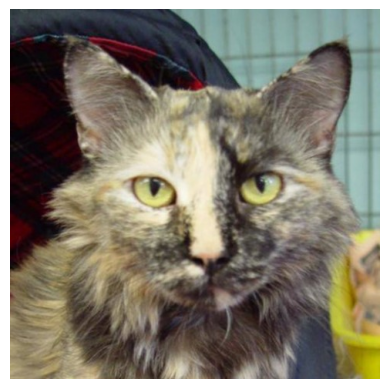

(480, 480, 3)

In [16]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load the image
cat = imread('cat.10.jpg')

# Plot the image
plt.imshow(cat)
plt.axis('off')
plt.show()

# Print the image shape
cat.shape

Now, `cat` is a three-dimensional array where the first and second dimensions correspond to height and width, and the third dimension corresponds to color channels. For simplicity, we want `cat` to be a two-dimensional array (matrix) representing a grayscale version of the original image. This can be done by computing an average of three channels per each pixel:

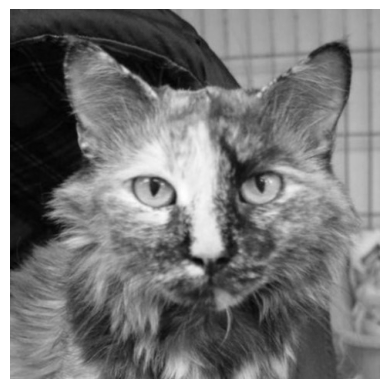

In [17]:
# Compute the mean of three channels
cat = cat.mean(axis=2)

# Plot the image
plt.imshow(cat)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

Now we can perform the SVD of `cat` and later truncate it in order to compress the image. In the cell below compute the SVD of `cat` such columns of `u` are left singular vectors, columns of `v` are right singular vectors, and `s` is a diagonal matrix.

In [18]:
# Compute the SVD of cat
u, s, vh = la.svd(cat)

# Make s a diagonal matrix
s = np.diag(s)

# Compute v
v = vh.T
s
# print(s[2,2])

array([[5.43236720e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.16949499e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.01417563e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.99882556e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.20386089e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.82297114e-02]])

We can define a function which accepts the matrices of the SVD, as well as a parameter `k`, and returns a matrix obtained by taking the first $k$ singular values and the first $k$ columns of $U$ and $V$. Complete the code below such that the required functionality is achieved.

In [19]:
def truncate(u, s, v, k):
    """Truncates the given SVD and returns an approximate low-rank matrix.

    Args:
        u: a matrix U.
        s: a matrix sigma.
        v: a matrix V.
        k: a number of singular vectors to preserve.

    Returns:
        A k-rank approximation of the original matrix.
    """
    result = np.zeros((u.shape[0], v.shape[1]))
    # Truncate the SVD and return the low-rank approximation
    result = u[:,:k].dot(s[:k,:k]).dot(v[:,:k].T)
    return result

Now we can use the obtained SVD of `cat` and the function `truncate` to compress `cat` with various values of $k$. Executing the cell below should produce various compressions of `cat` of increasing quality.

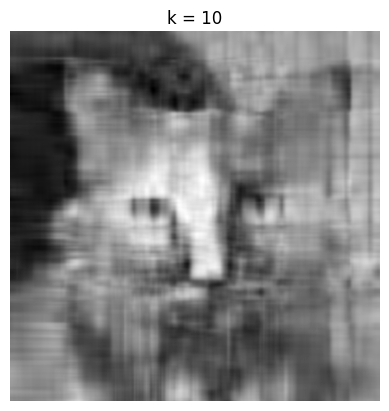

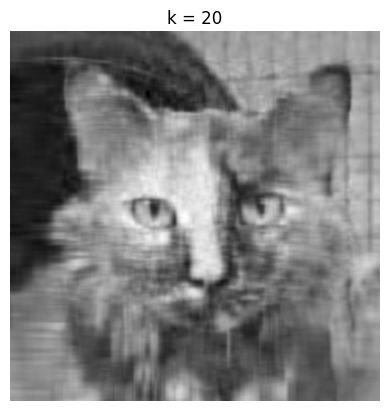

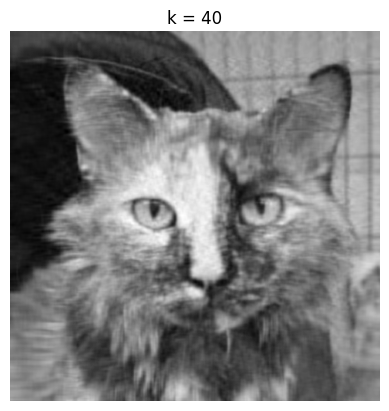

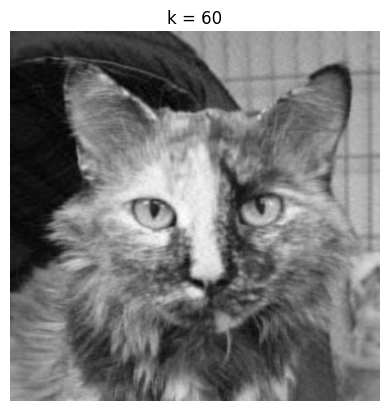

In [20]:
# Loop through various values of k
for k in (10, 20, 40, 60):
    # Truncate the SVD of the original cat
    cat_k = truncate(u, s, v, k)

    # Plot the truncated SVD
    plt.imshow(cat_k)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.title(f'k = {k}')
    plt.show()

The cat with $k=60$ seems to have a reasonable quality. It is recognizable and does not differ much from the original image. How many times less data do we need to use for the cat with $k=60$ in comparison to the original cat? Compute your answer in the cell below. Note that singular values can be combined with either columns of $U$ or $V$, so we do not have to count them.

In [21]:
# Compute the ratio of the amount of original and compressed data for the cat with k = 60
ratio =   (480*480) / (60*480 + 60*480)
ratio

4.0

<a name="references"></a>

## References

1.   Li, C.-K., & Strang, G. (2020). An elementary proof of Mirsky’s low rank approximation theorem. In The Electronic Journal of Linear Algebra (Vol. 36, Issue 36, pp. 694–697). University of Wyoming Libraries. https://doi.org/10.13001/ela.2020.5551
2.   https://www.kaggle.com/datasets/pavansanagapati/images-dataset?resource=download